
## Librerias

In [ ]:
import numpy as np
import pandas as pd
import math
import itertools

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, scale

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



## Dataset

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step



## Dimensiones

In [ ]:
print('Train: ', x_train.shape)
print('Test: ', x_test.shape)

Train:  (60000, 28, 28)
Test:  (10000, 28, 28)


In [ ]:
print('Train: ', y_train.shape)
print('Test: ', y_test.shape)

Train:  (60000,)
Test:  (10000,)


In [ ]:
unique_values = np.unique(y_train)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


## Nulos

In [ ]:
# Train
# hay algún valor nulo en x_train
has_nulls = np.isnan(x_train).any()

# contar el número total de valores nulos:
num_nulls = np.isnan(x_train).sum()

print(has_nulls)
print(num_nulls)

False
0


In [ ]:
# Train
#  hay algún valor nulo en y_train
has_nulls = np.isnan(y_train).any()

# contar el número total de valores nulos:
num_nulls = np.isnan(y_train).sum()

print(has_nulls)
print(num_nulls)

False
0


In [ ]:
# Test
#  hay algún valor nulo en y_test
has_nulls = np.isnan(y_test).any()

# contar el número total de valores nulos:
num_nulls = np.isnan(y_test).sum()

print(has_nulls)
print(num_nulls)

False
0


In [ ]:
#  hay algún valor nulo en x_test
has_nulls = np.isnan(x_test).any()

# contar el número total de valores nulos:
num_nulls = np.isnan(x_test).sum()

print(has_nulls)
print(num_nulls)

False
0



## Prendas de vestir

In [ ]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

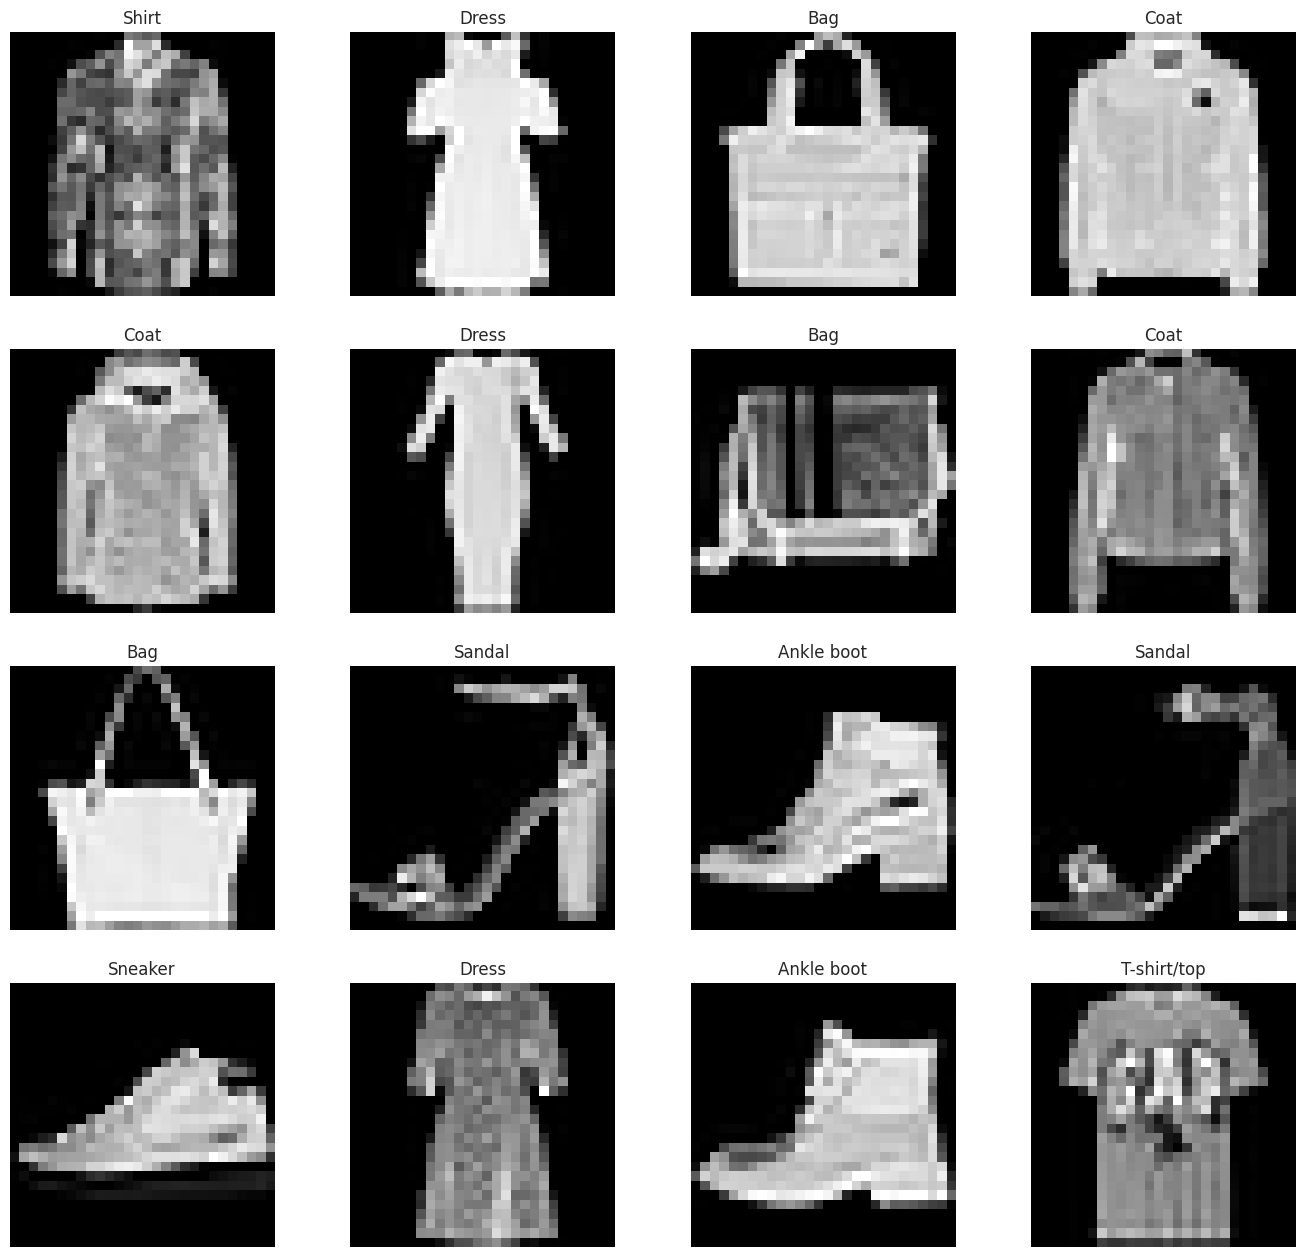

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for row in axes:
    for axe in row:
        index = np.random.randint(x_train.shape[0])  # Usamos x_train.shape[0] en lugar de 60000 para generalidad.
        img = x_train[index]
        label = y_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[label])
        axe.set_axis_off()

plt.show()



## Dataset balanceado


In [ ]:
combined_labels = np.concatenate([y_train, y_test])
label_counts = np.bincount(combined_labels)

for label, count in enumerate(label_counts):
    print(f"{label}: {count}")

0: 7000
1: 7000
2: 7000
3: 7000
4: 7000
5: 7000
6: 7000
7: 7000
8: 7000
9: 7000


##  Reshape


In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

## Escalamiento

In [ ]:

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255



## One Hot Encoding


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)



## ConvNet

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))

model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))

model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

Compilar


In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )

In [ ]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        1

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    return initial_lr * (decay_factor ** epoch)

reduce_lr = LearningRateScheduler(lr_schedule)

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,
        zoom_range = 0.1,
        shear_range = 0.3,
        width_shift_range=0.08,
        height_shift_range=0.08,
        vertical_flip=True)

In [ ]:
datagen.fit(x_train)


## Entrenamiento

In [ ]:
batch_size = 128
epochs = 40

In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=2,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/40


<ipython-input-47-c90db63c6e4c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,


468/468 - 27s - loss: 0.8141 - accuracy: 0.7105 - val_loss: 0.9592 - val_accuracy: 0.6910 - lr: 0.0010 - 27s/epoch - 57ms/step
Epoch 2/40
468/468 - 22s - loss: 0.5289 - accuracy: 0.8071 - val_loss: 0.3608 - val_accuracy: 0.8690 - lr: 9.0000e-04 - 22s/epoch - 46ms/step
Epoch 3/40
468/468 - 21s - loss: 0.4529 - accuracy: 0.8368 - val_loss: 0.3598 - val_accuracy: 0.8733 - lr: 8.1000e-04 - 21s/epoch - 45ms/step
Epoch 4/40
468/468 - 21s - loss: 0.4177 - accuracy: 0.8488 - val_loss: 0.3421 - val_accuracy: 0.8748 - lr: 7.2900e-04 - 21s/epoch - 44ms/step
Epoch 5/40
468/468 - 21s - loss: 0.3861 - accuracy: 0.8610 - val_loss: 0.3261 - val_accuracy: 0.8838 - lr: 6.5610e-04 - 21s/epoch - 45ms/step
Epoch 6/40
468/468 - 21s - loss: 0.3675 - accuracy: 0.8675 - val_loss: 0.2800 - val_accuracy: 0.8967 - lr: 5.9049e-04 - 21s/epoch - 46ms/step
Epoch 7/40
468/468 - 20s - loss: 0.3540 - accuracy: 0.8728 - val_loss: 0.2992 - val_accuracy: 0.8905 - lr: 5.3144e-04 - 20s/epoch - 43ms/step
Epoch 8/40
468/468 - 


## Evaluación

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.1952 - accuracy: 0.9317
Loss: 0.1952
Accuracy: 0.9317





## Gráfico de pérdida y precisión

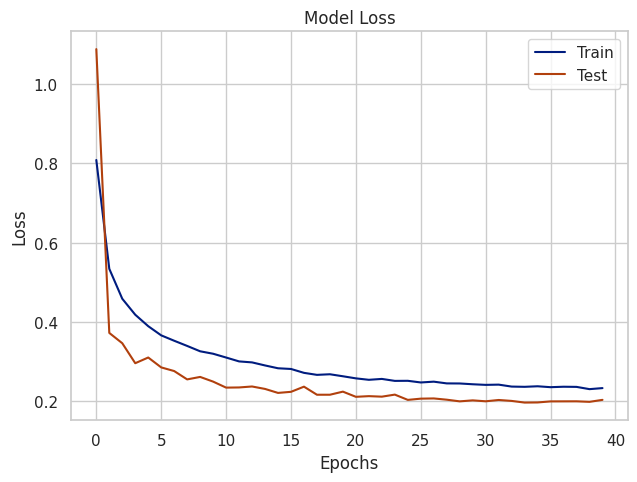

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

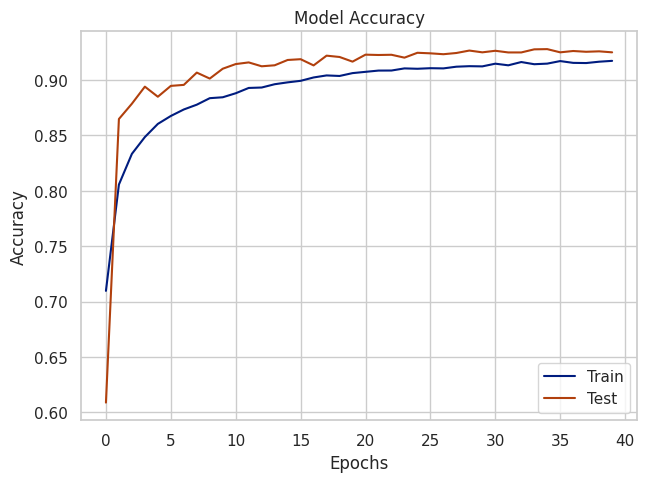

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Matriz de confusión

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 [==============================] - 1s 3ms/step


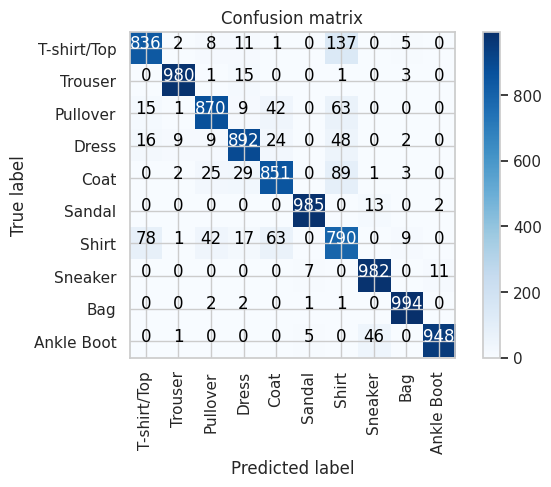

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx,
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

## Predicciones

In [ ]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Trouser\nActual Label : Trouser')

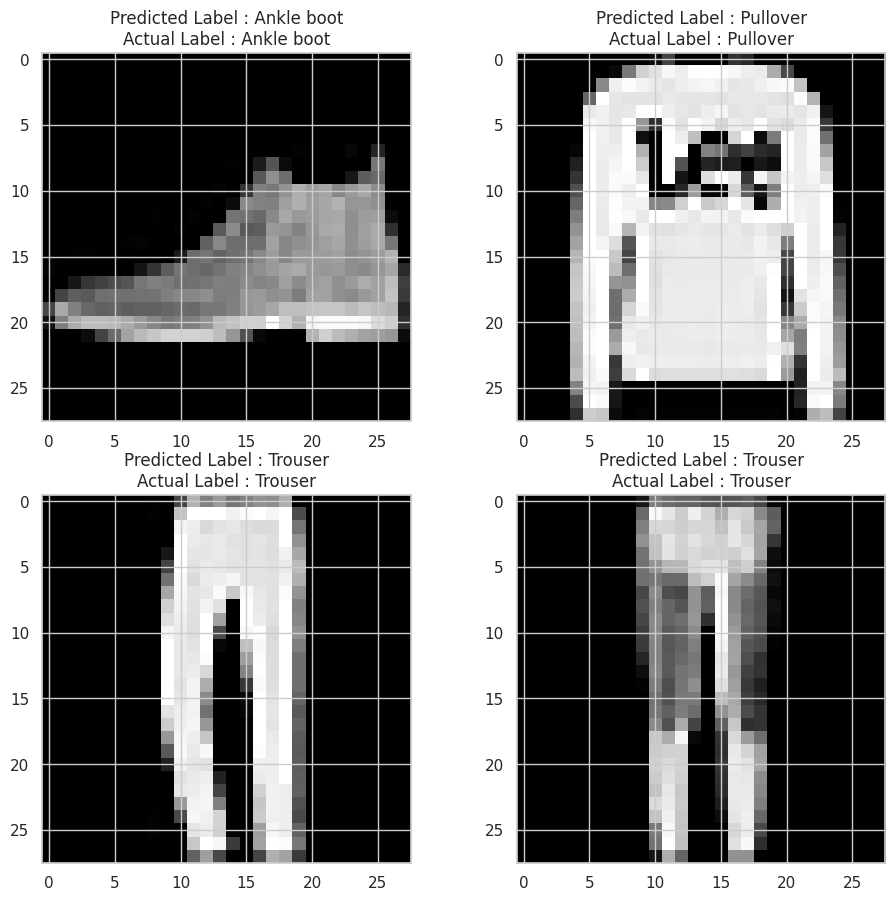

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[3]]]))

In [ ]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Trouser\nActual Label : Dress')

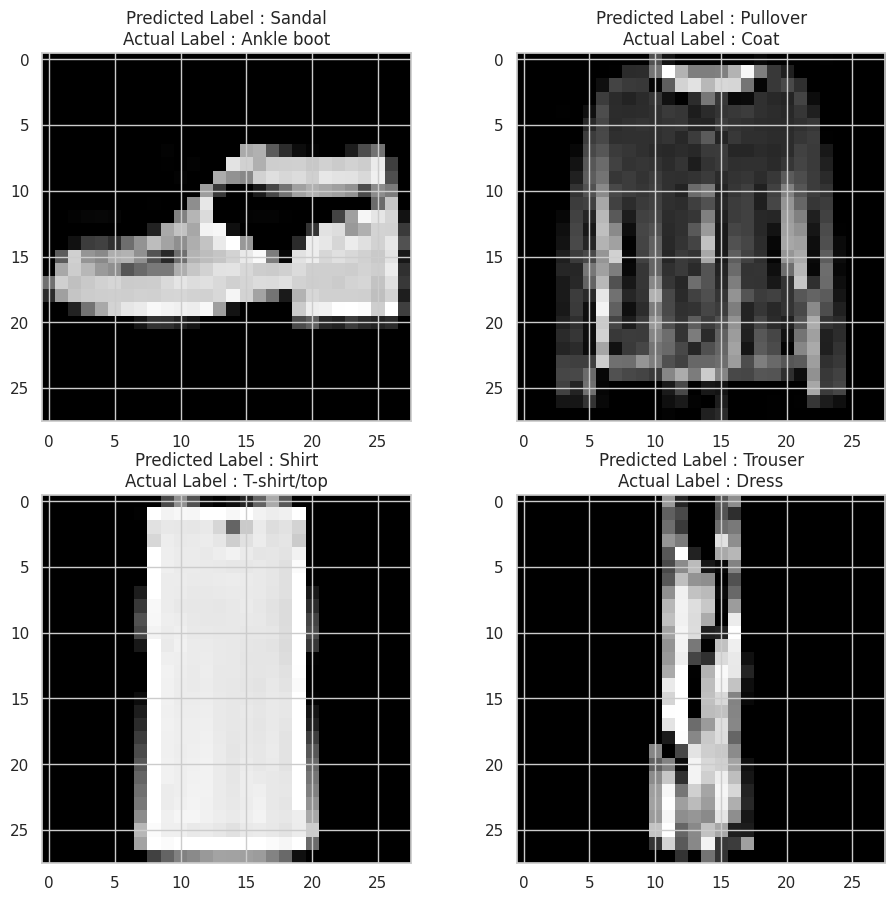

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[3]]]))

In [ ]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.91      0.83      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.88      0.89      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.90      0.88      0.89      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.73      0.84      0.78      1000
     Sneaker       0.95      0.99      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

